**Data Ceaning & Pre - Processing**

In [3]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [4]:
df=pd.read_csv("/content/alt_fuel_stations (Feb 3 2025).csv")
df.info()

<ipython-input-4-2a2d27f22cc6>:1: DtypeWarning: Columns (16,20,31,33,41,43,46,49,52,57,58,60,62,65,67,69,71,74) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/alt_fuel_stations (Feb 3 2025).csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93056 entries, 0 to 93055
Data columns (total 75 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Fuel Type Code                           93056 non-null  object 
 1   Station Name                             93055 non-null  object 
 2   Street Address                           93056 non-null  object 
 3   Intersection Directions                  25420 non-null  object 
 4   City                                     93053 non-null  object 
 5   State                                    93056 non-null  object 
 6   ZIP                                      93056 non-null  object 
 7   Plus4                                    0 non-null      float64
 8   Station Phone                            91075 non-null  object 
 9   Status Code                              93056 non-null  object 
 10  Expected Date                            0 non

In [5]:
data = df.copy()
columns_to_keep = ["Fuel Type Code", "Station Name", "Street Address",
    "City", "State", "ZIP", "Latitude", "Longitude",
    "EV Connector Types"]
data = data[columns_to_keep]
data[["City", "State", "ZIP", "EV Connector Types"]] = data[["City", "State", "ZIP", "EV Connector Types"]].fillna("Unknown")

Cleaned dataset saved as cleaned_alt_fuel_stations.csv


Exploratory Data Analysis

**Fuel Station Distribution**

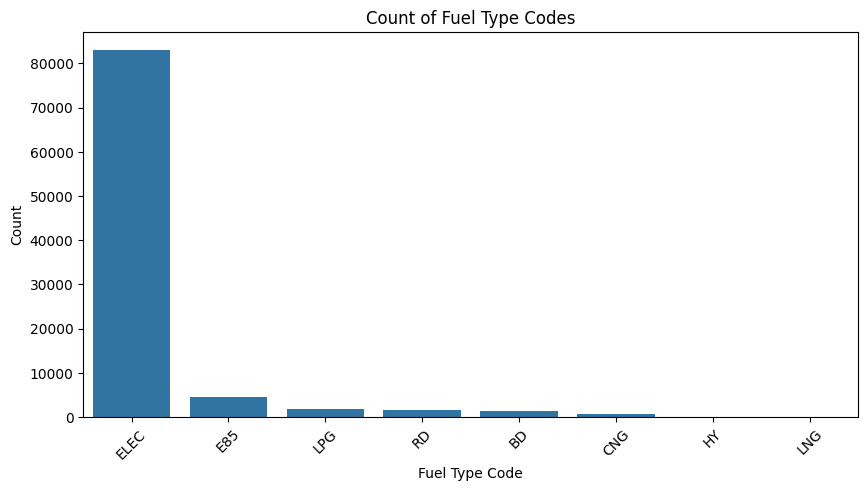

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="Fuel Type Code", order=data["Fuel Station Type"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Count of Fuel Type Codes")
plt.xlabel("Fuel Type Code")
plt.ylabel("Count")
plt.show()


**Top 10 Cities with the Most Alternative Fuel Stations**

<ipython-input-7-91fa08ba206c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")


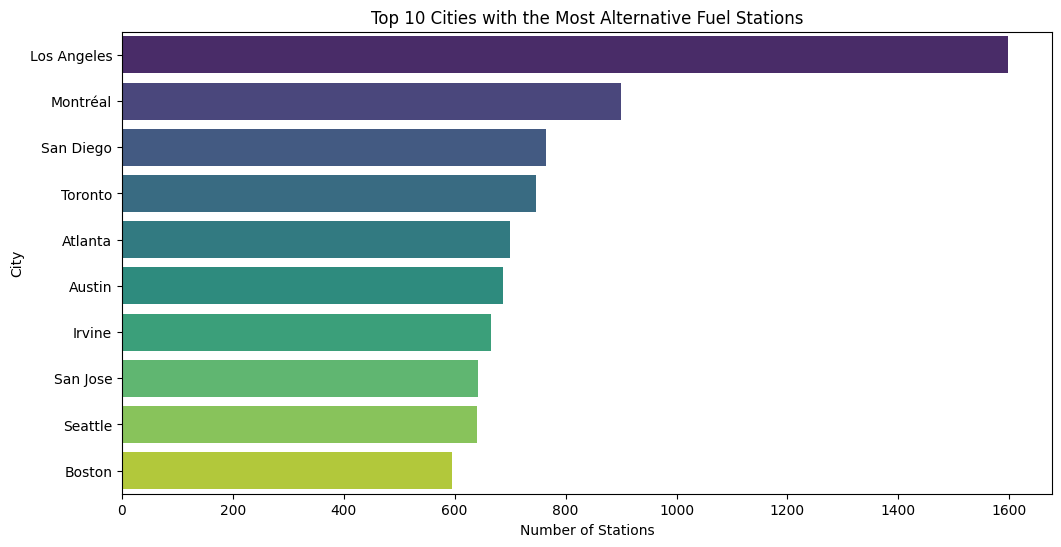

In [7]:
top_cities = data["City"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_cities.values, y=top_cities.index, palette="viridis")
plt.xlabel("Number of Stations")
plt.ylabel("City")
plt.title("Top 10 Cities with the Most Alternative Fuel Stations")
plt.show()


**Top 10 States with the Most Alternative Fuel Stations**

<ipython-input-8-6c2f46c3e3c8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_states.values, y=top_states.index, palette="magma")


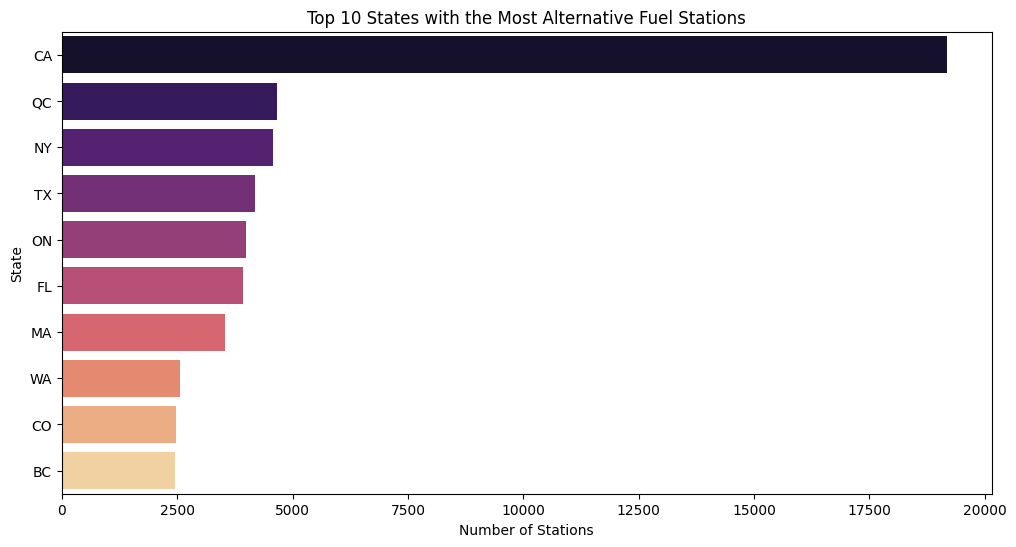

In [8]:
top_states = data["State"].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_states.values, y=top_states.index, palette="magma")
plt.xlabel("Number of Stations")
plt.ylabel("State")
plt.title("Top 10 States with the Most Alternative Fuel Stations")
plt.show()


**Density Plot of Alternative Fuel Stations**

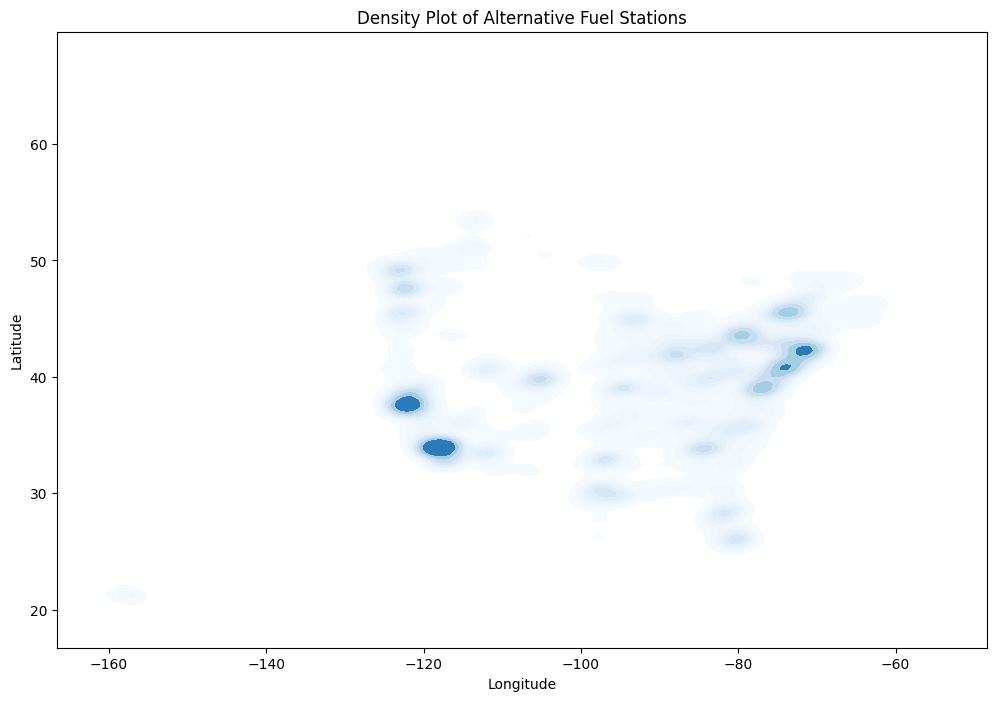

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.kdeplot(x=data["Longitude"], y=data["Latitude"], cmap="Blues", fill=True, bw_adjust=0.5)
plt.title("Density Plot of Alternative Fuel Stations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


**Geographical Distribution of Fuel Stations by Fuel Type**

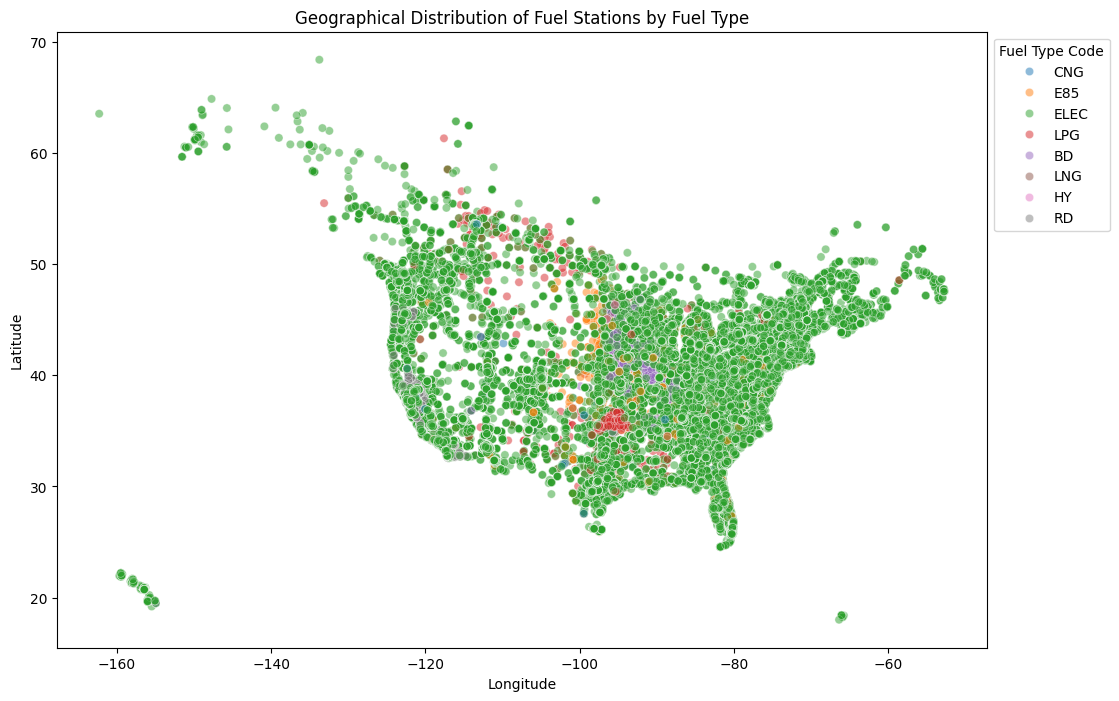

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x="Longitude", y="Latitude", hue="Fuel Type Code", alpha=0.5, palette="tab10")
plt.title("Geographical Distribution of Fuel Stations by Fuel Type")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Fuel Type Code", bbox_to_anchor=(1, 1))
plt.show()

In [14]:
avg_stations_per_city = data.groupby('City')['Station Name'].count().mean()
print(f"Average number of stations per city: {avg_stations_per_city:.2f}")

Average number of stations per city: 9.50


**Average Number of Electric Stations vs. All Stations in Top 10 Cities**

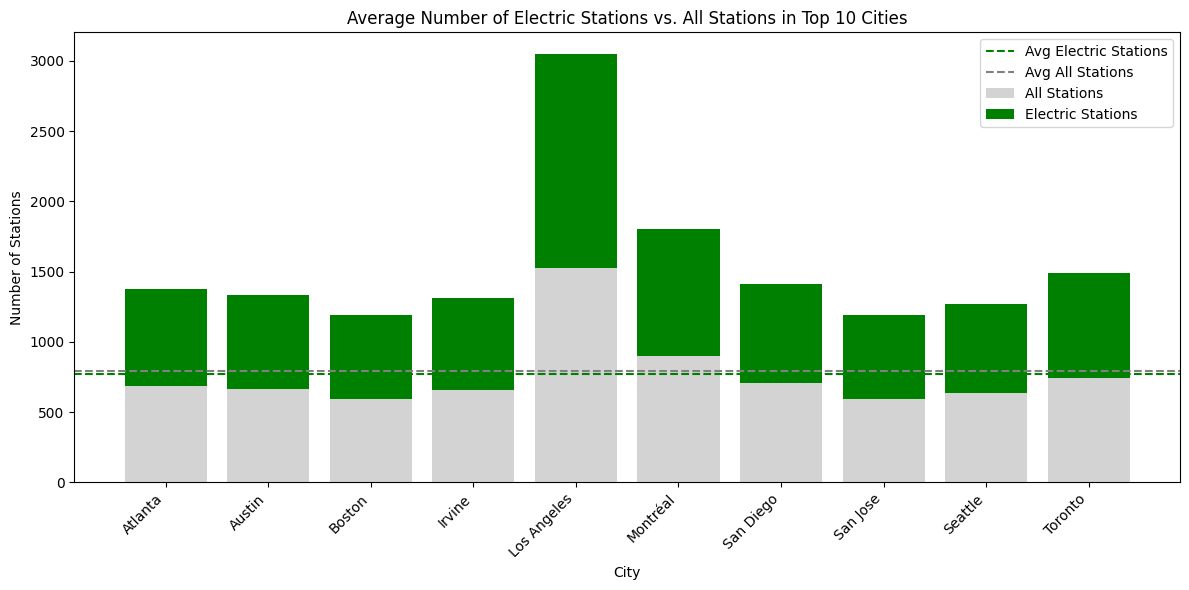

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

electric_stations = data[data['Fuel Type Code'] == 'ELEC']
stations_by_city = data.groupby('City')['Station Name'].count().reset_index()
electric_stations_by_city = electric_stations.groupby('City')['Station Name'].count().reset_index()
merged_data = pd.merge(stations_by_city, electric_stations_by_city, on='City', how='left', suffixes=('_all', '_electric'))
merged_data.fillna(0, inplace=True)

top_10_cities = merged_data.sort_values(by='Station Name_all', ascending=False).head(10)['City'].tolist()
merged_data = merged_data[merged_data['City'].isin(top_10_cities)]
avg_electric_stations = merged_data['Station Name_electric'].mean()
avg_all_stations = merged_data['Station Name_all'].mean()

plt.figure(figsize=(12, 6))
plt.bar(merged_data['City'], merged_data['Station Name_all'], label='All Stations', color='lightgray')
plt.bar(merged_data['City'], merged_data['Station Name_electric'], label='Electric Stations', color='green', bottom=merged_data['Station Name_electric'])
plt.axhline(y=avg_electric_stations, color='green', linestyle='--', label='Avg Electric Stations')
plt.axhline(y=avg_all_stations, color='gray', linestyle='--', label='Avg All Stations')
plt.xticks(rotation=45, ha='right')
plt.title('Average Number of Electric Stations vs. All Stations in Top 10 Cities')
plt.xlabel('City')
plt.ylabel('Number of Stations')
plt.legend()
plt.tight_layout()
plt.show()